# Домашнее задание №3

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [110]:
url="indian_liver_patient.csv"#http://yustiks.ru/dataset/indian_liver_patient.csv
data=pd.read_csv(url)
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

In [4]:
Direct_Bilirubin = data.Direct_Bilirubin
Direct_Bilirubin.head()

0    0.1
1    5.5
2    4.1
3    0.4
4    2.0
Name: Direct_Bilirubin, dtype: float64

In [5]:
Total_Bilirubin = data.Total_Bilirubin
Total_Bilirubin.head()

0     0.7
1    10.9
2     7.3
3     1.0
4     3.9
Name: Total_Bilirubin, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    Direct_Bilirubin,
    Total_Bilirubin,#то что предсказываем
    test_size = 0.2,# объем тестовой выборки
    random_state = 42#рендомная генерация
)

In [24]:
#решайеп для моделей
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [14]:
model.fit(X_train, y_train) #обучение модели

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
model.score(X_test, y_test)

0.94308064029161054

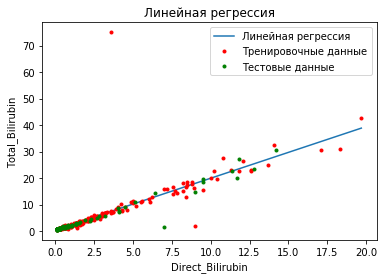

In [28]:
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(min(X_train), max(X_train), 100)
y = (model.coef_*x + model.intercept_) 
plt.plot(np.array(x).reshape(-1, 1),np.array(y).reshape(-1, 1)) #,без решейпа не хочет работать!
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'g.')
plt.legend(['Линейная регрессия', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Построить одномерную полиномиальную регрессию на Direct_Bilirubin и Total_Bilirubin, используя тренировочные и тестовые данные из шага выше. Проверить точность предсказаний на тестовых данных. Получилось ли улучшить результат?

In [30]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)#степень

X_poly = poly_reg.fit_transform(X_train) #переобразовываем наши данные в поли

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)#обучение

pol_reg.score(poly_reg.fit_transform(X_test), y_test)

0.93898486623916577

In [31]:
#результат хуже

Построить многомерную **логистическую регрессию** для предсказания болезни (Dataset) от всех параметров, предварительно разделив данные на 80% тренировочных и 20% тестовых. Сделать классификационный отчет (куда включить количество найденных параметров true positive и false negative). Посмотреть какой получился результат.

Улучшить модель за счет уменьшения параметров, отобранных для обучения модели. Выбрать только те атрибуты, которые коррелируют с таргет значением (атрибут Dataset) более 50% (нужно будет построить матрицу корреляций и посмотреть в ней параметры, наиболее коррелирующие с Dataset атрибутом). Проверить модель на тестовых данных, полученных выше. Построить классификационный отчет, сделать сравнение двух моделей по этим классификационным отчетам.

In [196]:
data=pd.read_csv(url)
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [197]:
data.dropna(inplace=True)


In [198]:

Dataset = data.Dataset
#Dataset.head()
#data.head()

In [199]:
X = data[['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']]

In [200]:
X['Gender'] = X.Gender.replace('Female','1')
X['Gender'] = X.Gender.replace('Male','2')
X.Gender = X.Gender.apply(pd.to_numeric)
X.info()
#X['Gender'] = X.Gender.index()
#X.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 10 columns):
Age                           579 non-null int64
Gender                        579 non-null int64
Total_Bilirubin               579 non-null float64
Direct_Bilirubin              579 non-null float64
Alkaline_Phosphotase          579 non-null int64
Alamine_Aminotransferase      579 non-null int64
Aspartate_Aminotransferase    579 non-null int64
Total_Protiens                579 non-null float64
Albumin                       579 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
dtypes: float64(5), int64(5)
memory usage: 49.8 KB


e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [201]:
print(len(X), len(Dataset))

579 579


In [202]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X,
    Dataset,
    test_size = 0.2,# объем тестовой выборки
    random_state = 42#рендомная генерация
)

In [203]:
X_train_1 = np.array(X_train_1)
X_test_1 = np.array(X_test_1)
y_train_1 = np.array(y_train_1)
y_test_1 = np.array(y_test_1)

print('X_train_1 ',len(X_train_1),'X_test_1 ',len(X_test_1),'y_train_1 ',len(y_train_1),'y_test_1 ',len(y_test_1)) #116+463 = 579

X_train_1  463 X_test_1  116 y_train_1  463 y_test_1  116


In [204]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear').fit(X_train_1, y_train_1)

In [205]:
from sklearn.metrics import classification_report

model_pred = model.predict(X_test_1)#предсказательная модель

print(classification_report(y_test_1, model_pred))

             precision    recall  f1-score   support

          1       0.63      0.99      0.77        73
          2       0.50      0.02      0.04        43

avg / total       0.58      0.63      0.50       116



In [206]:
data['Gender'] = data.Gender.replace('Female','1')
data['Gender'] = data.Gender.replace('Male','2')
data.Gender = data.Gender.apply(pd.to_numeric)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 11 columns):
Age                           579 non-null int64
Gender                        579 non-null int64
Total_Bilirubin               579 non-null float64
Direct_Bilirubin              579 non-null float64
Alkaline_Phosphotase          579 non-null int64
Alamine_Aminotransferase      579 non-null int64
Aspartate_Aminotransferase    579 non-null int64
Total_Protiens                579 non-null float64
Albumin                       579 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       579 non-null int64
dtypes: float64(5), int64(6)
memory usage: 74.3 KB


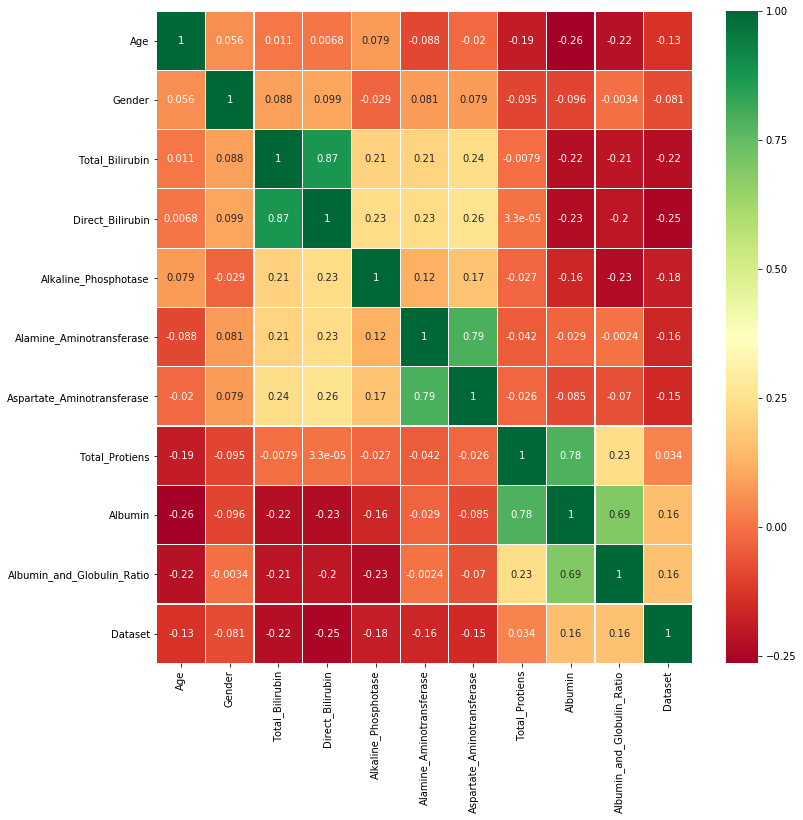

In [207]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [ ]:
#Корреляции  на 50% Нету!!! Максимум 25%

Посчитать квартили для всех колонок. 

In [209]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,1.758204,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,16.221786,0.428542,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,1.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,2.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,2.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,2.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

In [210]:
data=pd.read_csv(url)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [219]:
Dataset_49 = data[data.Age<50].Dataset
Dataset_49.describe()

count    353.000000
mean       1.317280
std        0.466078
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Dataset, dtype: float64

In [220]:
Dataset_50 = data[data.Age>=50].Dataset
Dataset_50.describe()

count    230.000000
mean       1.239130
std        0.427483
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: Dataset, dtype: float64

In [224]:
#разница среднеего и 3 квартиля. Второй квартиль не отличается

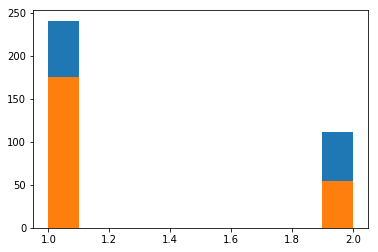

In [223]:
plt.hist(Dataset_49)
plt.hist(Dataset_50)
plt.show()


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [226]:
bol = data[data['Dataset']==1]['Total_Bilirubin']
stats.ttest_1samp(bol, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=2.4710633057466471, pvalue=0.013871861207640042)

In [ ]:
#зval всего 1% что значительно ниже 5% - огромное различие между выборками

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [227]:
bol = data[data['Dataset']==1]['Total_Bilirubin']
not_bol = data[data['Dataset']==2]['Total_Bilirubin']
stats.ttest_ind(bol, not_bol)

Ttest_indResult(statistic=5.4414411268348628, pvalue=7.8014309293643448e-08)

In [228]:
#различия полные - данные статистически не одинаковые

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [255]:
d_1 = data[data['Age']<30]['Dataset']
d_2 = data[data['Age']>=30][data['Age']<55]['Dataset']
#d_2 = data[data['Age']<50]#['Dataset']
d_3 = data[data['Age']>=55]['Dataset']

e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [257]:
d_2.head()

5     1
16    1
17    2
18    1
19    1
Name: Dataset, dtype: int64

In [258]:
stats.f_oneway(d_1, d_2, d_3)

F_onewayResult(statistic=9.3750488060252586, pvalue=9.8377308890922874e-05)

In [260]:
#отвергаем нулевую гипотезу
#С какой реальностью? задача стоит не четко.

Вопросы задавать на почту yustiks@gmail.com